# Gender-Auswertung erste drei Republik-Jahre

Dieses Skript lädt Daten aus Google Sheets, erstellt einige deskriptive Statistiken und exportiert fixfertige csv-Dateien, die ins Publikator-Charttool reinkopiert werden können.

## Setup

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline

## Daten laden

In [4]:
url = "https://docs.google.com/spreadsheets/d/1mnWP9D4VrU-Dxc4cnGNvs4Yf-a94Xs-3sZUyKDOu0Pk/gviz/tq?tqx=out:csv&sheet=Stories"

In [5]:
# df = pd.read_csv(url) For some reason this don't work
df = pd.read_csv('../data/data.csv')

**Einfachere Spaltennamen**

In [6]:
columns_new = [
    "formatRepoId",
    "repoId",
    "template",
    "Datum",
    "Jahr",
    "Format",
    "Titel",
    "Url",
    "Link",
    "Sachbearbeiterin",
    "Autorinnenzeile",
    "hatFrauen",
    "RolleFrauen",
    "hatTragendeFrauen",
    "nMännerExperten",
    "nFrauenExperten",
    "nMännerProtagonisten",
    "nFrauenProtagonisten",
    "Schwierigkeiten"
]

In [7]:
column_converter = dict(zip(df.columns, columns_new))

In [8]:
df = df.rename(columns=column_converter)

In [9]:
df = df[columns_new]

## Daten putzen

**Autorinnenzeile**

In [10]:
df.loc[~df['Autorinnenzeile'].isin(["nur männlich", "beides", "nur weiblich"]), 'Autorinnenzeile'] = np.nan

In [11]:
df.Autorinnenzeile = df.Autorinnenzeile.astype("category")

In [12]:
sorterAutorinnenzeile = ["nur männlich", "beides", "nur weiblich"]

In [13]:
df.Autorinnenzeile.cat.set_categories(sorterAutorinnenzeile, inplace=True)

**Rolle**

In [14]:
df.loc[~df['RolleFrauen'].isin(["Expertin, Auskunftsperson", "beides", "Betroffene, Protagonistin"]), 'RolleFrauen'] = np.nan

In [15]:
df.RolleFrauen = df.RolleFrauen.astype("category")
sorterRolleFrauen = ["Expertin, Auskunftsperson", "beides", "Betroffene, Protagonistin"]
df.RolleFrauen.cat.set_categories(sorterRolleFrauen, inplace=True)

## Übersicht über kategorisierte Beiträge

**Anzahl Beiträge nach Periode**

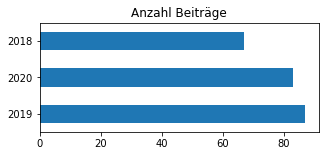

In [16]:
df['Jahr'].value_counts().plot(kind='barh', figsize=(5, 2), title='Anzahl Beiträge')

In [17]:
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df['Periode'] = df['Datum'].astype('datetime64[M]')

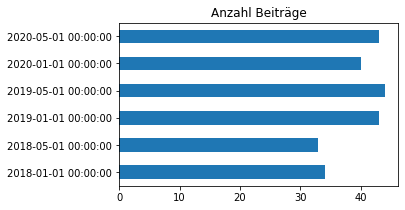

In [18]:
df['Periode'].value_counts().sort_index().plot(kind='barh', figsize=(5, 3), title='Anzahl Beiträge')

## Autorinnen und Autoren: Wer schreibt die Texte?

**Gesamtzeitraum**

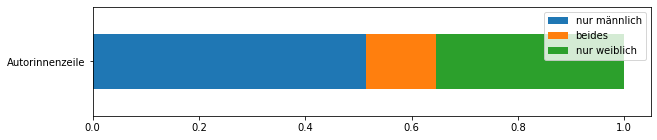

In [19]:
gr = df['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().sort_index().T
gr.plot(kind='barh', stacked=True, figsize=(10,2))

**pro Jahr**

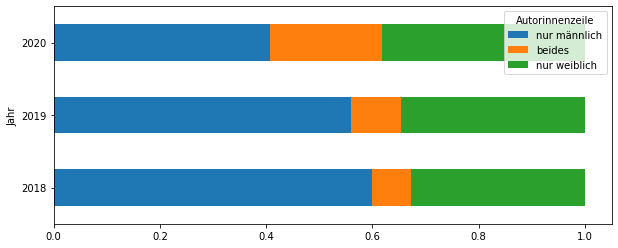

In [20]:
gr = df.groupby('Jahr')['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'Autorinnenzeile': 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr = gr[sorterAutorinnenzeile]
gr.plot(kind='barh', stacked=True, figsize=(10,4))

**pro Periode**

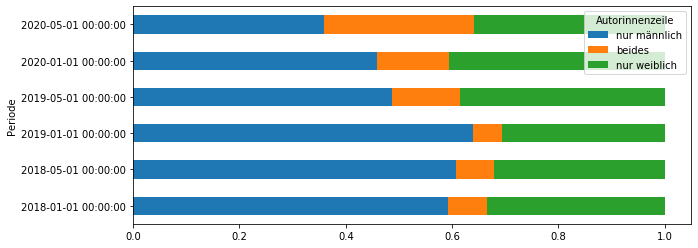

In [21]:
gr = df.groupby('Periode')['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'Autorinnenzeile': 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr = gr[sorterAutorinnenzeile]
gr.plot(kind='barh', stacked=True, figsize=(10,4))

## Hat es Frauen im Text?

**im ganzen Zeitraum**

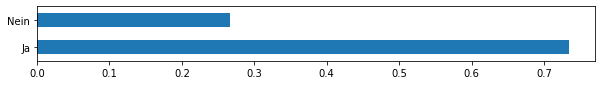

In [22]:
gr = df['hatFrauen'].value_counts(normalize=True)
gr.plot(kind='barh', figsize=(10,1))

**nach Jahr**

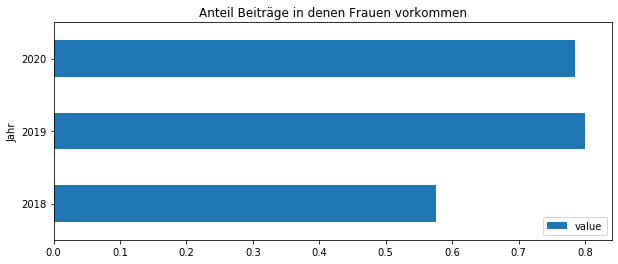

In [23]:
gr = df.groupby('Jahr')['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Jahr', 'value']]
gr.plot(x='Jahr', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen vorkommen')

**nach Periode**

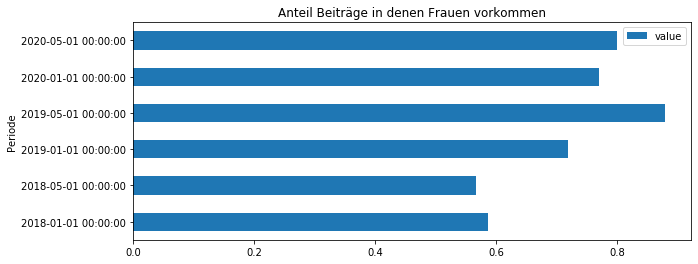

In [24]:
gr = df.groupby('Periode')['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Periode', 'value']]
gr.plot(x='Periode', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen vorkommen')

**nach Geschlecht**

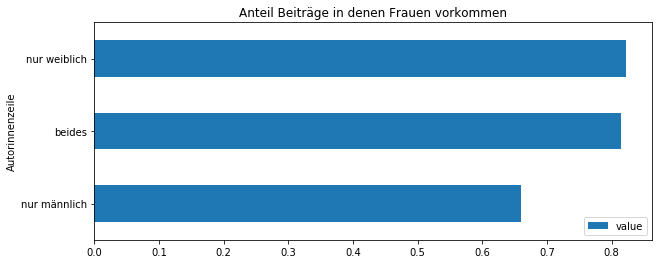

In [36]:
gr = df.groupby('Autorinnenzeile')['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Autorinnenzeile', 'value']]
gr.plot(x='Autorinnenzeile', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen vorkommen')

**nach Jahr und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5e57f0>,
      dtype=object)

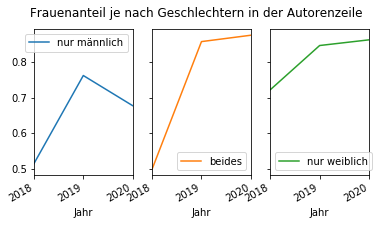

In [63]:
gr = df.groupby(['Autorinnenzeile', 'Jahr'])['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Autorinnenzeile', 'Jahr', 'value']]
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6, 3), title='Frauenanteil je nach Geschlechtern in der Autorenzeile')

**nach Periode und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f471f60>,
      dtype=object)

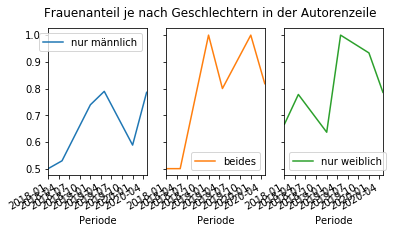

In [62]:
gr = df.groupby(['Autorinnenzeile', 'Periode'])['hatFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatFrauen': 'value'}).reset_index()
gr = gr[gr['hatFrauen'] == 'Ja'][['Autorinnenzeile', 'Periode', 'value']]
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Frauenanteil je nach Geschlechtern in der Autorenzeile')

## In welcher Rolle kommen Frauen im Text vor?

**im gesamten Zeitraum**

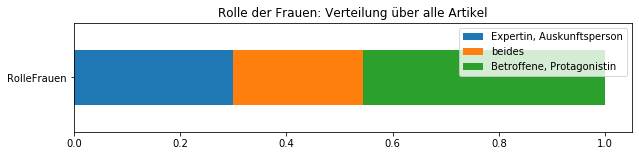

In [69]:
gr = df['RolleFrauen'].value_counts(normalize=True)
gr = gr.to_frame().sort_index().T
gr.plot(kind='barh', stacked=True, figsize=(10,2), title='Rolle der Frauen: Verteilung über alle Artikel')

**nach Jahr**

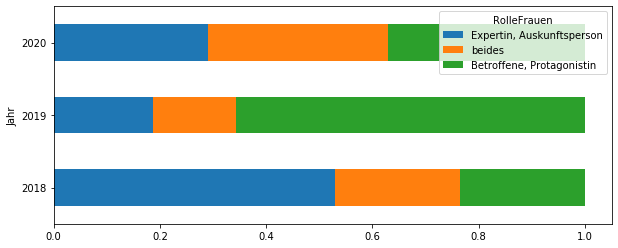

In [28]:
gr = df.groupby('Jahr')['RolleFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauen': 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='RolleFrauen', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung über alle Artikel')

**nach Periode**

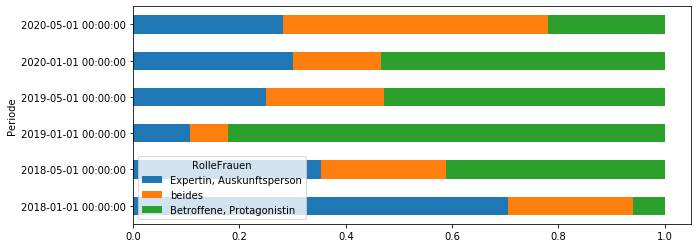

In [29]:
gr = df.groupby('Periode')['RolleFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauen': 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='RolleFrauen', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung über alle Artikel')

In [30]:
# Im Januar 2018 wurde vermutliche etwas anders oder falsch kategorisiert!!

**nach Geschlecht**

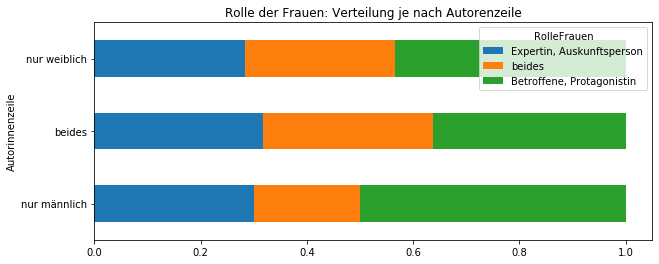

In [70]:
gr = df.groupby('Autorinnenzeile')['RolleFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'RolleFrauen': 'value'}).reset_index()
gr = gr.pivot(index='Autorinnenzeile', columns='RolleFrauen', values='value')
gr = gr[sorterRolleFrauen]
gr.plot(kind='barh', stacked=True, figsize=(10,4), title='Rolle der Frauen: Verteilung je nach Autorenzeile')

## Kommen Frauen in tragender Rolle vor?

**im ganzen Zeitraum**

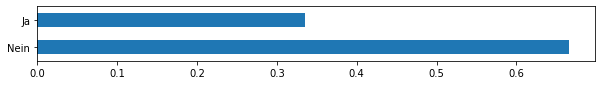

In [32]:
gr = df['hatTragendeFrauen'].value_counts(normalize=True)
gr.plot(kind='barh', figsize=(10,1))

**nach Jahr**

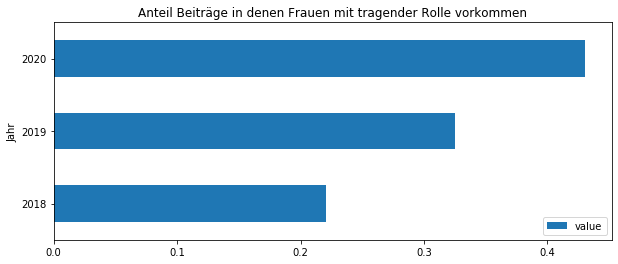

In [33]:
gr = df.groupby('Jahr')['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Jahr', 'value']]
gr.plot(x='Jahr', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen mit tragender Rolle vorkommen')

**nach Periode**

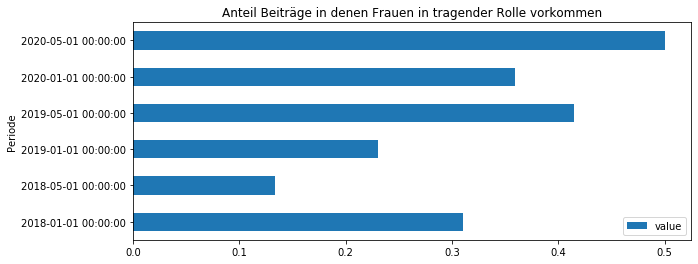

In [34]:
gr = df.groupby('Periode')['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Periode', 'value']]
gr.plot(x='Periode', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen in tragender Rolle vorkommen')

In [35]:
# Januar 2018 auch hier noch nicht richtig kategorisiert

**nach Geschlecht**

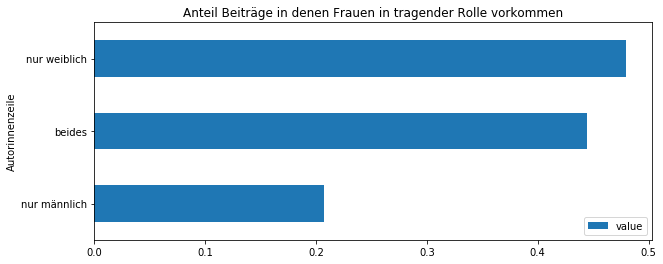

In [39]:
gr = df.groupby('Autorinnenzeile')['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Autorinnenzeile', 'value']]
gr.plot(x='Autorinnenzeile', y='value', kind='barh', stacked=True, figsize=(10,4), title='Anteil Beiträge in denen Frauen in tragender Rolle vorkommen')

**nach Jahr und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f894e80>,
      dtype=object)

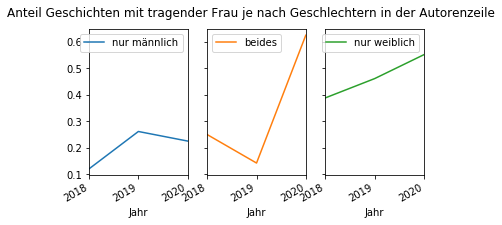

In [65]:
gr = df.groupby(['Autorinnenzeile', 'Jahr'])['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Autorinnenzeile', 'Jahr', 'value']]
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6, 3), title='Anteil Geschichten mit tragender Frau je nach Geschlechtern in der Autorenzeile')

**nach Periode und Geschlecht**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb9f6d8>,
      dtype=object)

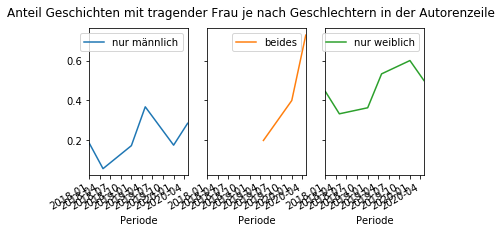

In [67]:
gr = df.groupby(['Autorinnenzeile', 'Periode'])['hatTragendeFrauen'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'hatTragendeFrauen': 'value'}).reset_index()
gr = gr[gr['hatTragendeFrauen'] == 'Ja'][['Autorinnenzeile', 'Periode', 'value']]
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr.plot(subplots=True, sharey=True, layout=(1, 3), figsize=(6,3), title='Anteil Geschichten mit tragender Frau je nach Geschlechtern in der Autorenzeile')